In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_food_delivery = pd.read_csv("food_delivery_data.csv")
df_food_delivery.head()

,OrderID,CustomerID,OrderDate,DeliveryDistanceKM,OrderAmount,DiscountApplied,DeliveryTimeMin
0,8180,436,27-11-2024,17.37,$35.53,0.70,42
1,2138,265,27-11-2024,4.44,$36.58,9.36,52
2,8737,193,31-10-2024,19.66,$79.93,3.38,59
3,1913,769,14-11-2024,1.99,$23.16,1.44,11
4,1506,982,05-01-2025,7.26,$24.95,11.87,36


In [3]:
df_food_delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   OrderID             500 non-null    int64  
 1   CustomerID          500 non-null    int64  
 2   OrderDate           500 non-null    object 
 3   DeliveryDistanceKM  500 non-null    float64
 4   OrderAmount         500 non-null    object 
 5   DiscountApplied     500 non-null    float64
 6   DeliveryTimeMin     500 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 27.5+ KB


In [4]:
df_food_type = pd.read_csv("food_delivery_data_with_food_type.csv")
df_food_type.head()

,OrderID,CustomerID,OrderDate,FoodType
0,3521,386,12-12-2024,Seafood
1,7430,259,02-11-2024,Pasta
2,5392,702,30-12-2024,Sushi
3,4477,344,09-01-2025,Dessert
4,1912,140,25-10-2024,Salad


In [5]:
df_food_type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   OrderID     500 non-null    int64 
 1   CustomerID  500 non-null    int64 
 2   OrderDate   500 non-null    object
 3   FoodType    500 non-null    object
dtypes: int64(2), object(2)
memory usage: 15.8+ KB


In [6]:
df_demography = pd.read_csv("food_delivery_data_with_demographics.csv")
df_demography.head()

,OrderID,CustomerID,OrderDate,Age,Gender,City
0,3521,386,12-12-2024,57,Male,CityB
1,7430,259,02-11-2024,68,Female,CityA
2,4477,344,09-01-2025,38,Female,CityC
3,1912,140,25-10-2024,63,Female,CityA
4,4841,406,07-01-2025,68,Other,CityA


In [7]:
df_demography.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   OrderID     225 non-null    int64 
 1   CustomerID  225 non-null    int64 
 2   OrderDate   225 non-null    object
 3   Age         225 non-null    int64 
 4   Gender      225 non-null    object
 5   City        225 non-null    object
dtypes: int64(3), object(3)
memory usage: 10.7+ KB


In [8]:
print("initial df: ", df_food_delivery.shape)
print("based on food type df: ", df_food_type.shape)
print("based on demography df: ", df_demography.shape)

initial df:  (500, 7)
based on food type df:  (500, 4)
based on demography df:  (225, 6)


Overview and Preprocessing of Data

In [9]:
df_food_delivery['OrderDate'] = pd.to_datetime(df_food_delivery['OrderDate'], format='%d-%m-%Y')
df_food_type['OrderDate'] = pd.to_datetime(df_food_type['OrderDate'], format='%d-%m-%Y')
df_demography['OrderDate'] = pd.to_datetime(df_demography['OrderDate'], format='%d-%m-%Y')

In [10]:
df_food_type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   OrderID     500 non-null    int64         
 1   CustomerID  500 non-null    int64         
 2   OrderDate   500 non-null    datetime64[ns]
 3   FoodType    500 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 15.8+ KB


In [11]:
df_food_type.head()

,OrderID,CustomerID,OrderDate,FoodType
0,3521,386,2024-12-12,Seafood
1,7430,259,2024-11-02,Pasta
2,5392,702,2024-12-30,Sushi
3,4477,344,2025-01-09,Dessert
4,1912,140,2024-10-25,Salad


In [14]:
#converting order amount to numeric - 
df_food_delivery['OrderAmount'] = df_food_delivery['OrderAmount'].replace('[\\$,]', '', regex=True).astype(float)

In [15]:
df_food_delivery.head()

,OrderID,CustomerID,OrderDate,DeliveryDistanceKM,OrderAmount,DiscountApplied,DeliveryTimeMin
0,8180,436,2024-11-27,17.37,35.53,0.70,42
1,2138,265,2024-11-27,4.44,36.58,9.36,52
2,8737,193,2024-10-31,19.66,79.93,3.38,59
3,1913,769,2024-11-14,1.99,23.16,1.44,11
4,1506,982,2025-01-05,7.26,24.95,11.87,36


In [16]:
df_food_delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   OrderID             500 non-null    int64         
 1   CustomerID          500 non-null    int64         
 2   OrderDate           500 non-null    datetime64[ns]
 3   DeliveryDistanceKM  500 non-null    float64       
 4   OrderAmount         500 non-null    float64       
 5   DiscountApplied     500 non-null    float64       
 6   DeliveryTimeMin     500 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(3)
memory usage: 27.5 KB


In [20]:
print(df_food_delivery.duplicated().sum()) # to check for duplicates in the dataset
print(df_food_type.duplicated().sum()) # to check for duplicates in the dataset
print(df_demography.duplicated().sum()) # to check for duplicates in the dataset

0
0
0


In [ ]:
df_food_delivery.isnull().sum()
df_food_type.isnull().sum()
df_demography.isnull().sum()

OrderID       0
CustomerID    0
OrderDate     0
Age           0
Gender        0
City          0
dtype: int64

In [ ]:
df_merged = pd.merge(
    df_food_delivery, 
    df_food_type, 
    on=['OrderID', 'CustomerID', 'OrderDate'], 
    how='left' 
)

df_merged = pd.merge(
    df_merged, 
    df_demography, 
    on=['OrderID', 'CustomerID', 'OrderDate'], 
    how='left'
)

df_merged.head()

,OrderID,CustomerID,OrderDate,DeliveryDistanceKM,OrderAmount,DiscountApplied,DeliveryTimeMin,FoodType,Age,Gender,City
0,8180,436,2024-11-27,17.37,35.53,0.70,42,NaN,NaN,NaN,NaN
1,2138,265,2024-11-27,4.44,36.58,9.36,52,NaN,NaN,NaN,NaN
2,8737,193,2024-10-31,19.66,79.93,3.38,59,NaN,NaN,NaN,NaN
3,1913,769,2024-11-14,1.99,23.16,1.44,11,NaN,NaN,NaN,NaN
4,1506,982,2025-01-05,7.26,24.95,11.87,36,NaN,NaN,NaN,NaN


In [23]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   OrderID             500 non-null    int64         
 1   CustomerID          500 non-null    int64         
 2   OrderDate           500 non-null    datetime64[ns]
 3   DeliveryDistanceKM  500 non-null    float64       
 4   OrderAmount         500 non-null    float64       
 5   DiscountApplied     500 non-null    float64       
 6   DeliveryTimeMin     500 non-null    int64         
 7   FoodType            0 non-null      object        
 8   Age                 0 non-null      float64       
 9   Gender              0 non-null      object        
 10  City                0 non-null      object        
dtypes: datetime64[ns](1), float64(4), int64(3), object(3)
memory usage: 43.1+ KB


Insight: All the values in the column foodtype, age, gender and city are null - indicating there are no common recods which share the same orderid, customerid and date.
Next Step: We try to proceed with individual dataset analysis instead of groping them and analyzing.

In [24]:
df_merged["FoodType"].isna().sum()

np.int64(500)

In [ ]:
#finding the number of records with common order id in the food delivery and food type datasets
set_food_delivery = set(df_food_delivery['OrderID'])
set_food_type = set(df_food_type['OrderID'])
common_orders = set_food_delivery.intersection(set_food_type)
print("Number of common OrderIDs:", len(common_orders))


Number of common OrderIDs: 21


In [ ]:
#analyzing the number of common records based on Orderid among all the three datasets.
set_food_demography = set(df_demography['OrderID'])
print(len(common_orders.intersection(set_food_demography)))

10


In [ ]:
#number of common records based on cusotmerid in the food delivery and food type datasets
set_customer_delivery = set(df_food_delivery['CustomerID'])
set_customer_type = set(df_food_type['CustomerID'])
common_customers = set_customer_delivery.intersection(set_customer_type)
print("Number of common CustomerIDs:", len(common_customers))


Number of common CustomerIDs: 177


In [ ]:
#common records from all the three datasets.
set_food_demography = set(df_demography['CustomerID'])
print(len(common_orders.intersection(set_food_demography)))

0


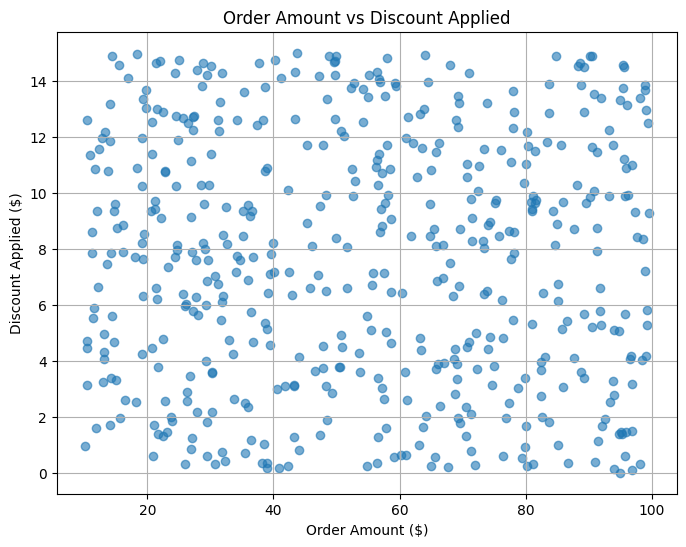

In [ ]:
order_data = df_food_delivery
# Relationship between Order Amount and Discount Applied
plt.figure(figsize=(8, 6))
plt.scatter(order_data['OrderAmount'], order_data['DiscountApplied'], alpha=0.6)
plt.title('Order Amount vs Discount Applied')
plt.xlabel('Order Amount ($)')
plt.ylabel('Discount Applied ($)')
plt.grid(True)
plt.show()

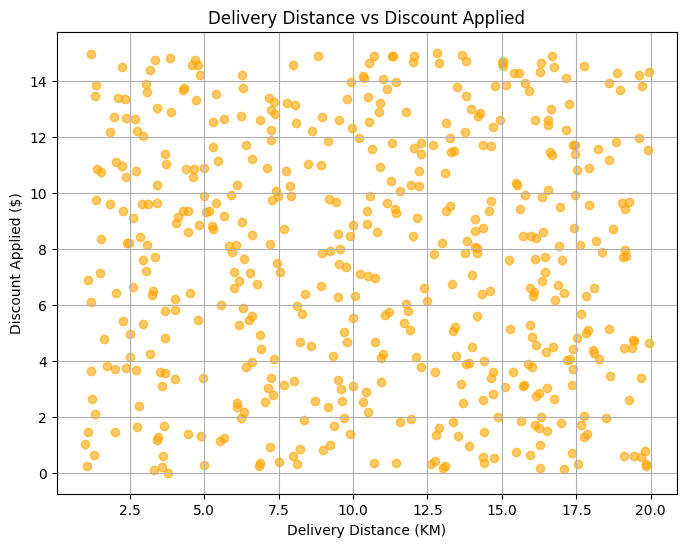

In [ ]:
# Impact of Delivery Distance on Discount Applied
plt.figure(figsize=(8, 6))
plt.scatter(order_data['DeliveryDistanceKM'], order_data['DiscountApplied'], alpha=0.6, color='orange')
plt.title('Delivery Distance vs Discount Applied')
plt.xlabel('Delivery Distance (KM)')
plt.ylabel('Discount Applied ($)')
plt.grid(True)
plt.show()

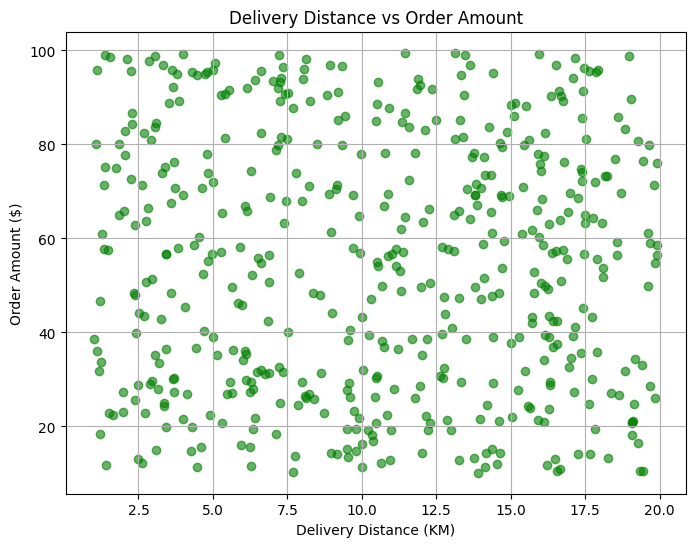

In [ ]:
# Impact of Delivery Distance over Order Amount
plt.figure(figsize=(8, 6))
plt.scatter(order_data['DeliveryDistanceKM'], order_data['OrderAmount'], alpha=0.6, color='green')
plt.title('Delivery Distance vs Order Amount')
plt.xlabel('Delivery Distance (KM)')
plt.ylabel('Order Amount ($)')
plt.grid(True)
plt.show()


Order distribution by age group

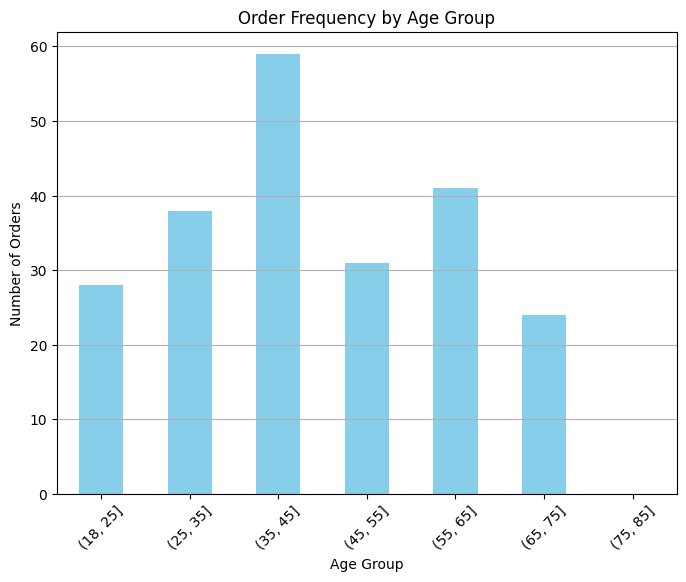

In [ ]:
age_bins = [18, 25, 35, 45, 55, 65, 75, 85]
demographic_data = df_demography
demographic_data['AgeGroup'] = pd.cut(demographic_data['Age'], bins=age_bins)

age_group_counts = demographic_data['AgeGroup'].value_counts().sort_index()
plt.figure(figsize=(8, 6))
age_group_counts.plot(kind='bar', color='skyblue')
plt.title('Order Frequency by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Order Distribution by Gender

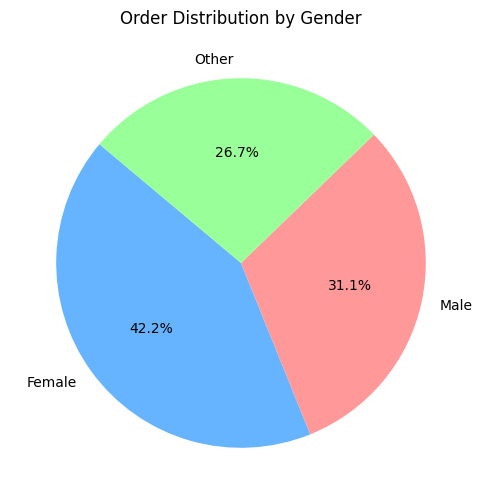

In [ ]:
gender_counts = demographic_data['Gender'].value_counts()
plt.figure(figsize=(6, 6))
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['#66b3ff', '#ff9999', '#99ff99'])
plt.title('Order Distribution by Gender')
plt.ylabel('')
plt.show()

Order distribution by city

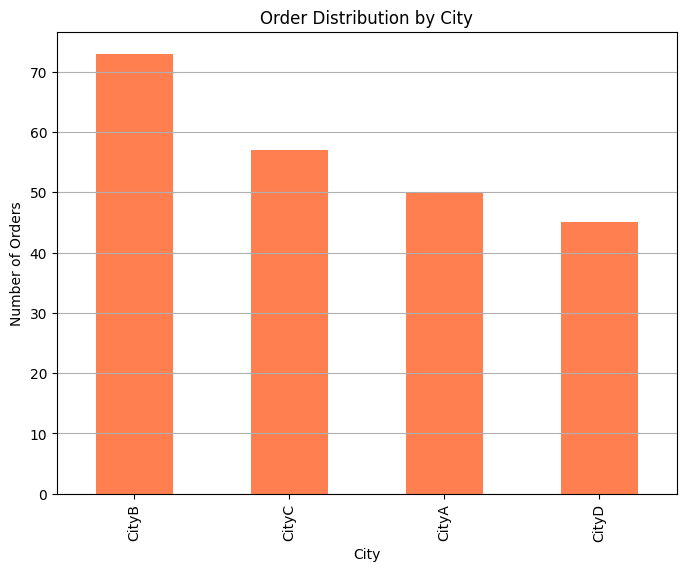

In [ ]:
city_counts = demographic_data['City'].value_counts()
plt.figure(figsize=(8, 6))
city_counts.plot(kind='bar', color='coral')
plt.title('Order Distribution by City')
plt.xlabel('City')
plt.ylabel('Number of Orders')
plt.grid(axis='y')
plt.show()

Food Type vs Order Frequency

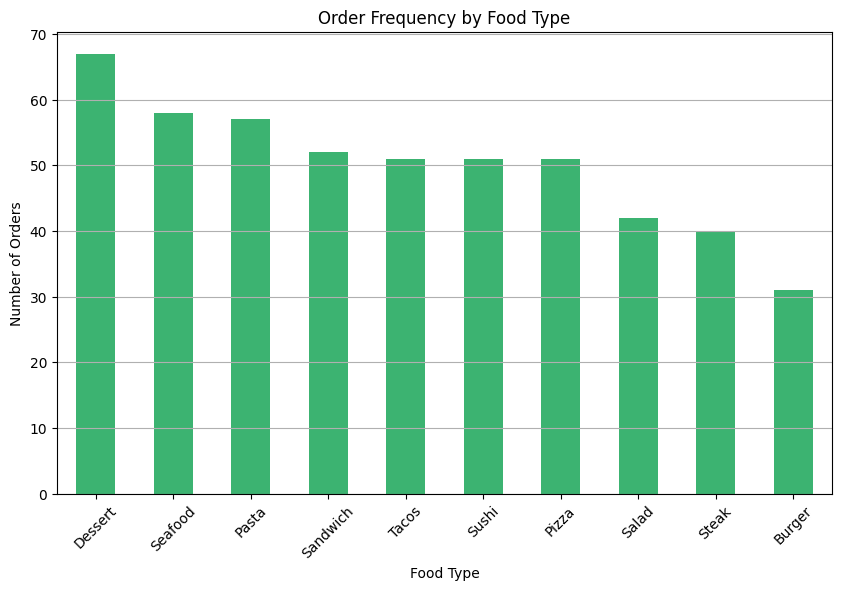

In [ ]:
food_type_data = df_food_type
food_type_counts = food_type_data['FoodType'].value_counts()

plt.figure(figsize=(10, 6))
food_type_counts.plot(kind='bar', color='mediumseagreen')
plt.title('Order Frequency by Food Type')
plt.xlabel('Food Type')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

K-Means on df_food-delivery dataset to derive further insights

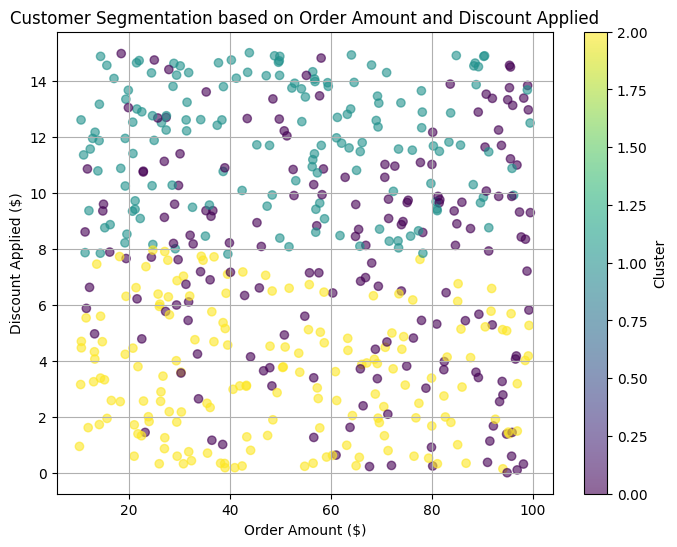

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

order_features = order_data[['OrderAmount', 'DiscountApplied', 'DeliveryDistanceKM']]
order_features = order_features.dropna()

scaler = StandardScaler()
order_features_scaled = scaler.fit_transform(order_features)

kmeans = KMeans(n_clusters=3, random_state=42)
order_data['Cluster'] = kmeans.fit_predict(order_features_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(order_data['OrderAmount'], order_data['DiscountApplied'], c=order_data['Cluster'], cmap='viridis', alpha=0.6)
plt.title('Customer Segmentation based on Order Amount and Discount Applied')
plt.xlabel('Order Amount ($)')
plt.ylabel('Discount Applied ($)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

In [47]:
# Analyze cluster characteristics
cluster_summary = order_data.groupby('Cluster').mean()[['OrderAmount', 'DiscountApplied', 'DeliveryDistanceKM']]
print(cluster_summary)

         OrderAmount  DiscountApplied  DeliveryDistanceKM
Cluster                                                  
0          62.617486         7.717371            4.674629
1          50.342949        11.792628           13.432756
2          49.837160         3.570059           14.030651
